# Antal rum

In [2]:
import os
import glob

import pandas as pd

%matplotlib inline

In [3]:
from helpers import *

# Data prep

In [84]:
files = glob.glob('../indata/supermappen/*Antrumbas*.csv')

In [85]:
files

['../indata/supermappen/Tabell14G_Antrumbas2014.csv',
 '../indata/supermappen/Tabell14C_Antrumbas2016.csv',
 '../indata/supermappen/Tabell14I_Antrumbas2013.csv',
 '../indata/supermappen/Tabell14K_Antrumbas2012.csv',
 '../indata/supermappen/Tabell14E_Antrumbas2015.csv',
 '../indata/supermappen/Tabell14A_Antrumbas2017.csv']

In [86]:
def readAntrum(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=[0,1])
    df['year'] = pd.to_datetime(getYear(file))
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [87]:
df = pd.concat(list(map(readAntrum, files)))

In [88]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [89]:
df = df.rename(columns={
    'Unnamed: 0_level_0 Basområde': 'BASKOD2010'
})

In [90]:
df = baskod2010tobasomrade(df).drop(columns=['BASKOD2010', 'BASKOD2000'])

In [102]:
df.head()

,Småhus hyresrätt,Småhus bostadsrätt,Småhus äganderätt,Flerbostadshus hyresrätt,Flerbostadshus bostadsrätt,Flerbostadshus äganderätt,Specialbostad,Övriga,Uppgift saknas om upplåtelseform,year,basomrade
1,0.0,0.0,0.0,2.5,2.6,0.0,0.0,2.5,0.0,2014,1010120_skeppsbron
2,2.8,3.0,0.0,2.5,2.6,0.0,0.0,2.6,0.0,2014,1010130_munkbron
3,2.7,3.8,3.4,2.6,2.3,0.0,1.4,2.9,0.0,2014,1010140_stortorget
4,0.0,0.0,0.0,0.0,2.8,0.0,0.0,1.9,0.0,2014,1010201_centralstationen_n
6,0.0,0.0,0.0,2.5,3.5,0.0,0.0,0.0,0.0,2014,1010220_klara_kyrka


# Antal rum per flerbostadshus, bostadsrätt

In [113]:
concept = 'n_rooms_multhab_owned'

In [114]:
subset = df[['Flerbostadshus bostadsrätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Flerbostadshus bostadsrätt': 'value'
})

In [115]:
output = appendNewDatapoints(concept, subset, new=True)

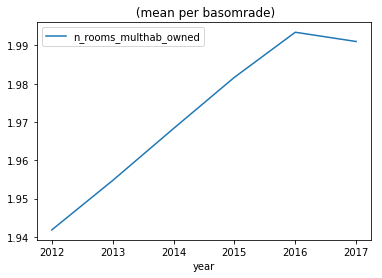

In [116]:
plotcombined(output, concept)

# Antal rum per småhus,  äganderätt

In [120]:
concept = 'n_rooms_small_house_owned'

In [121]:
subset = df[['Småhus äganderätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Småhus äganderätt': 'value'
})

In [122]:
output = appendNewDatapoints(concept, subset, new=True)

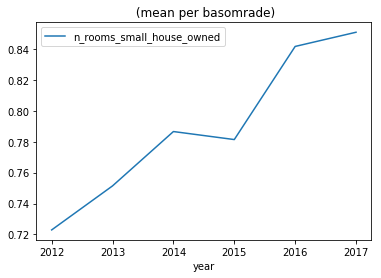

In [123]:
plotcombined(output, concept)

# Antal rum per flerbostadshus, hyresrätt

In [124]:
concept = 'n_rooms_multhab_rented'

In [125]:
subset = df[['Flerbostadshus hyresrätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Flerbostadshus hyresrätt': 'value'
})

In [126]:
output = appendNewDatapoints(concept, subset, new=True)

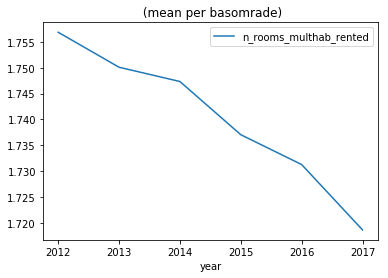

In [127]:
plotcombined(output, concept)